### Linear regression

#### Problem formulation
* dependent variable 𝑦 on 
* set of independent variables 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of predictors

You assume a linear relationship between 𝑦 and x: **𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀**. ( regression equation )

* 𝛽₀, 𝛽₁, …, 𝛽ᵣ are the regression coefficients
* 𝜀 is the random error.

Linear regression calculates the estimators of the regression coefficients.

The estimated or predicted response, 𝑓(𝐱ᵢ), for each observation 𝑖 = 1, …, 𝑛, should be as close as possible to the corresponding actual response 𝑦ᵢ. 

The differences 𝑦ᵢ - 𝑓(𝐱ᵢ) for all observations 𝑖 = 1, …, 𝑛, are called the **residuals**. Regression is about determining the best predicted weights, that is the weights corresponding to the smallest residuals.

To get the best weights, you usually minimize the sum of squared residuals (SSR) for all observations 𝑖 = 1, …, 𝑛: SSR = Σᵢ(𝑦ᵢ - 𝑓(𝐱ᵢ))². This approach is called the method of ordinary least squares.

#### Regression performance
𝑅² tells you which amount of variation in 𝑦 can be explained by the dependence on 𝐱 using the particular regression model. Larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs.

The value 𝑅² = 1 corresponds to SSR = 0, that is to the perfect fit since the values of predicted and actual responses fit completely to each other.


#### Implementation

There are five basic steps when you’re implementing linear regression:

1. Import the packages and classes you need.
2. Provide data to work with and eventually do appropriate transformations.
3. Create a regression model and fit it with existing data.
4. Check the results of model fitting to know whether the model is satisfactory.
5. Apply the model for predictions.

##### Step 1: Import packages and classes

In [1]:
# import the package numpy and the class LinearRegression from sklearn.linear_model
import numpy as np
from sklearn.linear_model import LinearRegression


##### Step 2: Provide data
The inputs (regressors, 𝑥) and output (predictor, 𝑦) should be arrays (the instances of the class numpy.ndarray) or similar objects. <br>
Create datapoints: two arrays with values [5,7,8,13,2,17,3,10,4,11,12,9,6] and [99,96,87,78,111,93,103,87,94,78,77,85,86] respectively.

In [5]:
# Create the two numpy arrays: x, y
x=[5,7,8,13,2,17,3,10,4,11,12,9,6]
y=[99,96,87,78,111,93,103,87,94,78,77,85,86]


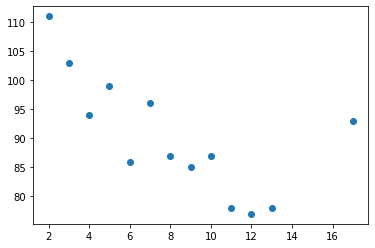

In [8]:
# Check the data with a simple scatter plot using pyplot 
import matplotlib.pyplot as plt
plt.scatter(x,y)


Now, you have two arrays: the input x and output y. You should call .reshape() on x because this array is required to be two-dimensional, or to be more precise, to have one column and as many rows as necessary. That’s exactly what the argument (-1, 1) of .reshape() specifies.

In [12]:
# Reshape x to be a column vector
x=np.asarray(x).reshape(-1,1)
# Check the format of x and y by printing them


array([[ 5],
       [ 7],
       [ 8],
       [13],
       [ 2],
       [17],
       [ 3],
       [10],
       [ 4],
       [11],
       [12],
       [ 9],
       [ 6]])

##### Step 3: Create a model and fit it
Let’s create an instance of the class LinearRegression, which will represent the regression model. Afterwards we have to fit the model.

In [14]:
# Create an instance of class LinearRegression: model
model=LinearRegression()

# Fit the model
model.fit(x,y)

LinearRegression()

##### Step 4: Get results
Once you have your model fitted, you can get the results to check whether the model works satisfactorily and interpret it. <br>
You can obtain the coefficient of determination (𝑅²) with .score() called on model.

In [17]:
# Calculate the coefficient of determination: r_sq
r_sq=model.score(x,y)

# Print r_sq
r_sq

0.46452151522421914

The attributes of model are .intercept_, which represents 𝑏₀ and .coef_, which represents 𝑏₁. Print these.

In [21]:
# Print b_0 and b_1
model.intercept_
model.coef_


array([-1.6125085])

You can notice that .intercept_ is a scalar, while .coef_ is an array.

The value 𝑏₀ = 103.58 (approximately) illustrates that your model predicts the response 103.58 when 𝑥 is zero. The value 𝑏₁ = -1.61 means that the predicted response decreases by 1.61 when 𝑥 is increased by one.

Plot the result:

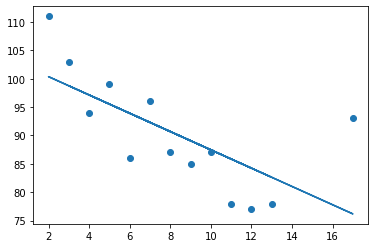

In [24]:
# Plot the datapoints AND the calculated regression line (you have just calculated its parameters)
m=model.coef_
b=model.intercept_
plt.scatter(x,y)
plt.plot(x,m*x+b)




There is an outlier in the datapoints. Find it, and remove it from the data (with this step you will give your model much better chances).

In [26]:
# Find the outlier among your x and y datapoints
# First check x and y (print them)
y


[99, 96, 87, 78, 111, 93, 103, 87, 94, 78, 77, 85, 86]

In [27]:
# Which (x,y) pair do you think the outlier is? Delete it.
# Create new datasets: x_new, y_new

x_new=np.delete(x,5,0)
y_new=np.delete(y,5,0)



Now, repeat the model creation, and see the improvement.

In [30]:
# Create an instance of class LinearRegression: model2
model2=LinearRegression()

# Fit the model
model2.fit(x_new,y_new)

LinearRegression()

In [33]:
# Calculate the coefficient of determination: r_sq2
r_sq2=model2.score(x_new,y_new)

# Print r_sq
r_sq2

0.8470500175669965

In [38]:
# Print b_0 and b_1
b2=model2.intercept_
m2=model2.coef_

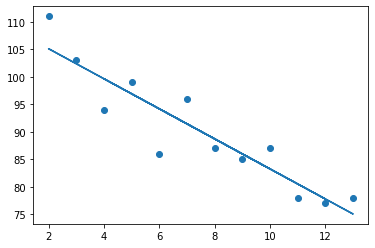

In [40]:
# Plot the datapoints AND the calculated regression line (you have just calculated its parameters)

plt.scatter(x_new,y_new)
plt.plot(x_new, m2*x_new+b2)





##### Step 5: Predict response
Once there is a satisfactory model, you can use it for predictions with either existing or new data.

You have already calculated 𝑏₀ and 𝑏₁. Predict the y values for some new x datapoints by the 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥 formula.

In [11]:
# Choose some new (realistic) datapoints (which you are interested in) and shape it to the appropriate format: newdata
# Use your (better) model to predict on these new datapoints



# Check the result


### Logistic regression

* „classification via regression"
* binary classification algorithm


#### Example
Let’s say that your goal is to build a logistic regression model in Python in order to determine whether candidates would get admitted to a prestigious university.

Here, there are two possible outcomes: Admitted (represented by the value of ‘1’) vs. Rejected (represented by the value of ‘0’).

You can then build a logistic regression in Python, where:

* The dependent variable represents whether a person gets admitted; and
* The 3 independent variables are the GMAT score, GPA and Years of work experience

#### a) importing the needed packages

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

#### b) building a dataframe

In [42]:
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


#### c) Creating the logistic regression

In [52]:
# Set the independent and the dependent variables: X and y
X=df[['gmat','gpa','work_experience']]
y=df['admitted']

In [54]:
# Apply train_test_split with size 0.25 and 0.75
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=42)

In [61]:
# Create the logistic regression model
model=LogisticRegression()

# Fit the model
model.fit(X_train,y_train)

# Do prediction on the values of X_test
y_pred=model.predict(X_test)

#### d) Creating a confusion matrix

In [63]:
# Use the crosstab function to compare the predicted and the original y values: confusion_matrix
# Specify the row- and colnames
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'], colnames=['Predcited'])
confusion_matrix

Predcited,0,1
Actual,,
0,6,1
1,0,3


Now you obtained a DataFrame. To make it spectacular, find out how to make a *heatmap* out of a DataFrame.

0.9


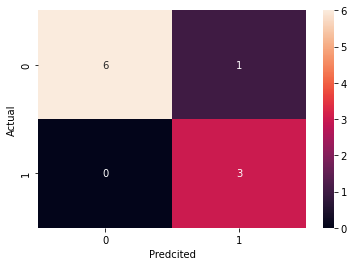

In [69]:
# Create a heatmap out of the above obtained confusion matrix
# Check what is the difference of the True and False values of the 'annot' parameter
sn.heatmap(confusion_matrix, annot=True)

# Use the accuracy_score function and print the accuracy 

#### e) Predicting new data

Let’s say that you have a new set of data, with 5 new candidates. Your goal is to use the existing logistic regression model to predict whether the new candidates will get admitted.<br>
The new dataset is given below.

In [70]:
new_candidates = {'gmat': [590,740,680,610,710],
                  'gpa': [2,3.7,3.3,2.3,3],
                  'work_experience': [3,4,6,1,5]
                  }

df2 = pd.DataFrame(new_candidates,columns= ['gmat', 'gpa','work_experience'])
df2

,gmat,gpa,work_experience
0,590,2.0,3
1,740,3.7,4
2,680,3.3,6
3,610,2.3,1
4,710,3.0,5


In [72]:
# Do prediction on the new dataset
y_pred=model.predict(df2)

# Print the dataframe of the new data AND the prediction

array([0, 1, 1, 0, 1], dtype=int64)

### Linear regression real-life example

https://www.kaggle.com/mruanova/gdp-forecasting/notebook